In [1]:
# Notebook adapted from Jeremy P. Howard

In [3]:
import numpy as np
from numpy.random import random, randn
from matplotlib import pyplot as plt, animation, rcParams, rc
def linear_function(alpha,beta,x): return alpha+beta*x
rc('animation',html='html5')
rcParams['figure.figsize'] = 3, 3

In [4]:
def linear_function(alpha,beta,x): 
    return alpha+beta*x

In [5]:
beta_true = 6.0
alpha_true = 3.0
n = 500
x = random(n)
y = linear_function(alpha_true,beta_true,x)+0.2*randn(n)+6*np.random.binomial(1,0.03,size=n)-6*np.random.binomial(1,0.007,size=n)

beta = -1.
alpha = 3.
delta_huber = 0.1
learning_rate = 0.01

In [6]:
def update_alpha_and_beta():
    global alpha, beta
    y_predicted = linear_function(alpha,beta,x)
    derivative_of_loss_wrt_alpha = 2*(y_predicted-y)
    derivative_of_loss_wrt_beta = x* derivative_of_loss_wrt_alpha
    alpha = alpha - learning_rate*derivative_of_loss_wrt_alpha.mean()
    beta = beta - learning_rate*derivative_of_loss_wrt_beta.mean()
def animate(i):
    x = np.linspace(0,1,100)
    y = linear_function(alpha,beta,x)
    line.set_data(x,y)
    for i in range(20): 
        update_alpha_and_beta()
    return (line,)

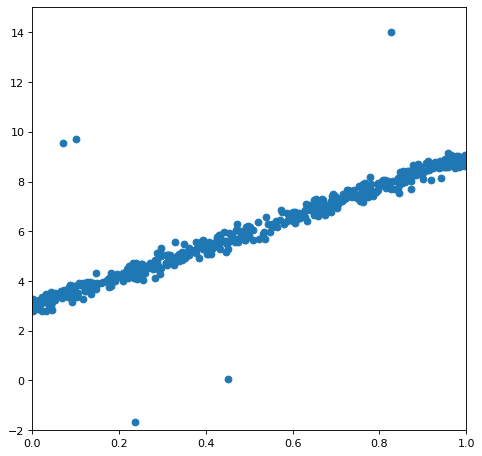

In [6]:
fig = plt.figure(dpi=80,figsize=(7,7))
ax = fig.add_subplot(111)
ax.set_xlim((0,1))
ax.set_ylim((-2,15))
plt.scatter(x,y)
line, = ax.plot([],[],lw=2)

In [7]:
resulting_animation = animation.FuncAnimation(fig,animate,np.arange(0,250),interval=100)

In [8]:
# Comment out (or delete) the following command, which shows the animation in Jupyter Notebook, 
# if you want the mp4 saved to disk to be correctly animated. 
# (Alternatively, you can reset the values of alpha and beta to their initial values 
# after this command.)

resulting_animation

In [9]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
resulting_animation.save('resulting_animation.mp4', writer=writer)

In [10]:
print('Done.')

Done.
